#LIBERARIES

In [263]:
#---------------------------------------------------------------------------------------------->NUMPY
import numpy as np
#---------------------------------------------------------------------------------------------->PANDA
import pandas as pd
#---------------------------------------------------------------------------------------------->PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#---------------------------------------------------------------------------------------------->GRID_SEARCH
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------------------------------->SPLITTING_DATA
from sklearn.model_selection import train_test_split
#---------------------------------------------------------------------------------------------->SCORE_FOR_REGRESSION
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
#---------------------------------------------------------------------------------------------->ENCODING(LabelEncoder,OrdinalEncoder,OrdinalEncoder)
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OrdinalEncoder
#---------------------------------------------------------------------------------------------->REGRESSION_MODELS(XGBRegressor,LinearRegression)
from sklearn.linear_model import LinearRegression,Ridge,Lasso
#---------------------------------------------------------------------------------------------->OUTLIERS_PLOT
import plotly.express as px

#LOAD_DATA

In [264]:
df = pd.read_csv('/content/insurance-data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#CHECK_OULIERS

<Axes: >

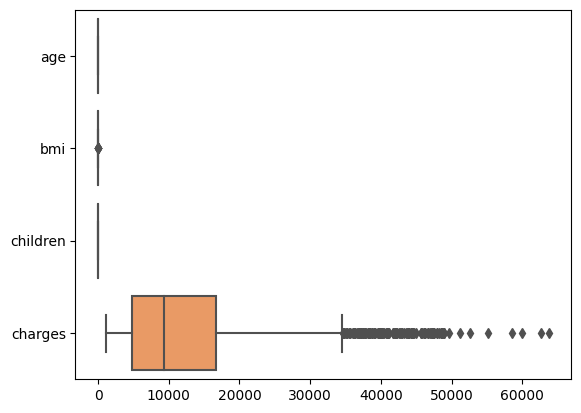

In [265]:
sns.boxplot(data=df,palette='rainbow',orient='h')

#DISPLOT_OUTLIER_COL(CHARGES)

In [266]:
def makeplot(df,colors):
    for feature in df.columns:
        fig=px.box(df,y=feature,title="<b>"+feature,color=colors,boxmode="group",
                  template="plotly_dark",points="all")
        fig.update_layout(title_x=0.5,title_font_size=30,font_size=15,font_color="aqua")
        fig.show()

In [267]:
makeplot(df,df["charges"])

#ENCODING

In [268]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [269]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [270]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [271]:
ENCODING_MAP = {'yes': 1,'no':0}
df['smoker'] = [ENCODING_MAP[i] for i in df['smoker']]

In [272]:
ENCODING_MAP = {'female': 1,'male':0}
df['sex'] = [ENCODING_MAP[i] for i in df['sex']]

In [273]:
df_dummies = pd.get_dummies(df['region'],drop_first=True, prefix='region')
new_df = pd.concat([df, df_dummies], axis=1)
new_df.drop(['region'],axis=1,inplace=True)

In [274]:
new_df['smoker'].unique()

array([1, 0])

In [275]:
new_df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0
1334,18,1,31.920,0,0,2205.98080,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,1


#SPLITTING_DATA

In [276]:
x=new_df.loc[:,new_df.columns != 'charges']
y=new_df['charges']

In [277]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

#WITHOUT_OUTLIERS_LINEAR_REGRESSION

In [278]:
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]})
grid_result = G_L_REG.fit(x_train, y_train)
print(grid_result.best_params_)

{'fit_intercept': True, 'positive': True}


In [279]:
        y_pred_test_L_N=grid_result.predict(x_test)
        score_test_L_N=r2_score(y_test,y_pred_test_L_N)*100
        print("score_test_L_N for our testing dataset with tuning is : {:.2f}%".format(score_test_L_N))

score_test_L_N for our testing dataset with tuning is : 78.14%


#OUTLIERS_Transform_log transformation

In [280]:
new_df_LG=new_df.copy()

In [281]:
new_df_LG['charges'] = np.log10(new_df_LG['charges'])
new_df_LG['bmi'] = np.log10(new_df_LG['bmi'])

In [282]:
x_LG=new_df_LG.loc[:,new_df_LG.columns != 'charges']
y_LG=new_df_LG['charges']

In [283]:
x_train_LG,x_test_LG,y_train_LG,y_test_LG=train_test_split(x_LG,y_LG,test_size=.2,random_state=42)

In [284]:
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]})
grid_result_LG= G_L_REG.fit(x_train_LG, y_train_LG)
print(grid_result_LG.best_params_)

{'fit_intercept': True, 'positive': False}


In [285]:
        y_pred_test_L_LG=grid_result_LG.predict(x_test_LG)
        score_test_L_LG=r2_score(y_test_LG,y_pred_test_L_LG)*100
        print("score_test_L_LOG for our testing dataset with tuning is : {:.2f}%".format(score_test_L_LG))

score_test_L_LOG for our testing dataset with tuning is : 80.50%


#OUTLIERS_Detection using IQR

In [286]:
new_df_QR=new_df.copy()

In [287]:
Q1 = new_df_QR['charges'].quantile(0.25)
Q3 = new_df_QR['charges'].quantile(0.75)
IQR = Q3-Q1
df_remove_outliers = new_df_QR[((new_df_QR['charges'] >= (Q1-1.5*IQR)) | (new_df_QR['charges'] <= (Q3+1.5*IQR)))]

In [288]:
x_QR=df_remove_outliers.loc[:,df_remove_outliers.columns != 'charges']
y_QR=df_remove_outliers['charges']

In [289]:
x_train_QR,x_test_QR,y_train_QR,y_test_QR=train_test_split(x_QR,y_QR,test_size=.2,random_state=42)

In [290]:
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]})
grid_result_QR= G_L_REG.fit(x_train_QR, y_train_QR)
print(grid_result_QR.best_params_)

{'fit_intercept': True, 'positive': True}


In [291]:
        y_pred_test_L_QR=grid_result_QR.predict(x_test_QR)
        score_test_L_QR=r2_score(y_test_QR,y_pred_test_L_QR)*100
        print("score_test_L_QR for our testing dataset with tuning is : {:.2f}%".format(score_test_L_QR))

score_test_L_QR for our testing dataset with tuning is : 78.14%


#OUT_LIERS_LOWER_UPPER_LIMIT

In [292]:
new_df_SF=new_df.copy()

In [293]:
lower_limit = new_df_SF['charges'].mean() - 3*new_df_SF['charges'].std()
upper_limit = new_df_SF['charges'].mean() + 3*new_df_SF['charges'].std()
print(lower_limit)
print(upper_limit)

-23059.611444940747
49600.45597522326


In [294]:
df_scores_filtered=new_df_SF[(new_df_SF['charges']>lower_limit)&(new_df_SF['charges']<upper_limit)]
print(df_scores_filtered)

      age  sex     bmi  children  smoker      charges  region_northwest  \
0      19    1  27.900         0       1  16884.92400                 0   
1      18    0  33.770         1       0   1725.55230                 0   
2      28    0  33.000         3       0   4449.46200                 0   
3      33    0  22.705         0       0  21984.47061                 1   
4      32    0  28.880         0       0   3866.85520                 1   
...   ...  ...     ...       ...     ...          ...               ...   
1333   50    0  30.970         3       0  10600.54830                 1   
1334   18    1  31.920         0       0   2205.98080                 0   
1335   18    1  36.850         0       0   1629.83350                 0   
1336   21    1  25.800         0       0   2007.94500                 0   
1337   61    1  29.070         0       1  29141.36030                 1   

      region_southeast  region_southwest  
0                    0                 1  
1            

In [295]:
x_SF=df_scores_filtered.loc[:,df_scores_filtered.columns != 'charges']
y_SF=df_scores_filtered['charges']

In [296]:
x_train_SF,x_test_SF,y_train_SF,y_test_SF=train_test_split(x_SF,y_SF,test_size=.2,random_state=42)

In [297]:
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid = {'fit_intercept': [True, False], 'positive': [True, False]})
grid_result_SF= G_L_REG.fit(x_train_SF, y_train_SF)
print(grid_result_SF.best_params_)

{'fit_intercept': True, 'positive': True}


In [298]:
y_pred_test_L_SF=grid_result_SF.predict(x_test_SF)
score_test_L_SF=r2_score(y_test_SF,y_pred_test_L_SF)*100
print("score_test_L_SF for our testing dataset with tuning is : {:.2f}%".format(score_test_L_SF))

score_test_L_SF for our testing dataset with tuning is : 77.56%


#FINAL_RESULT

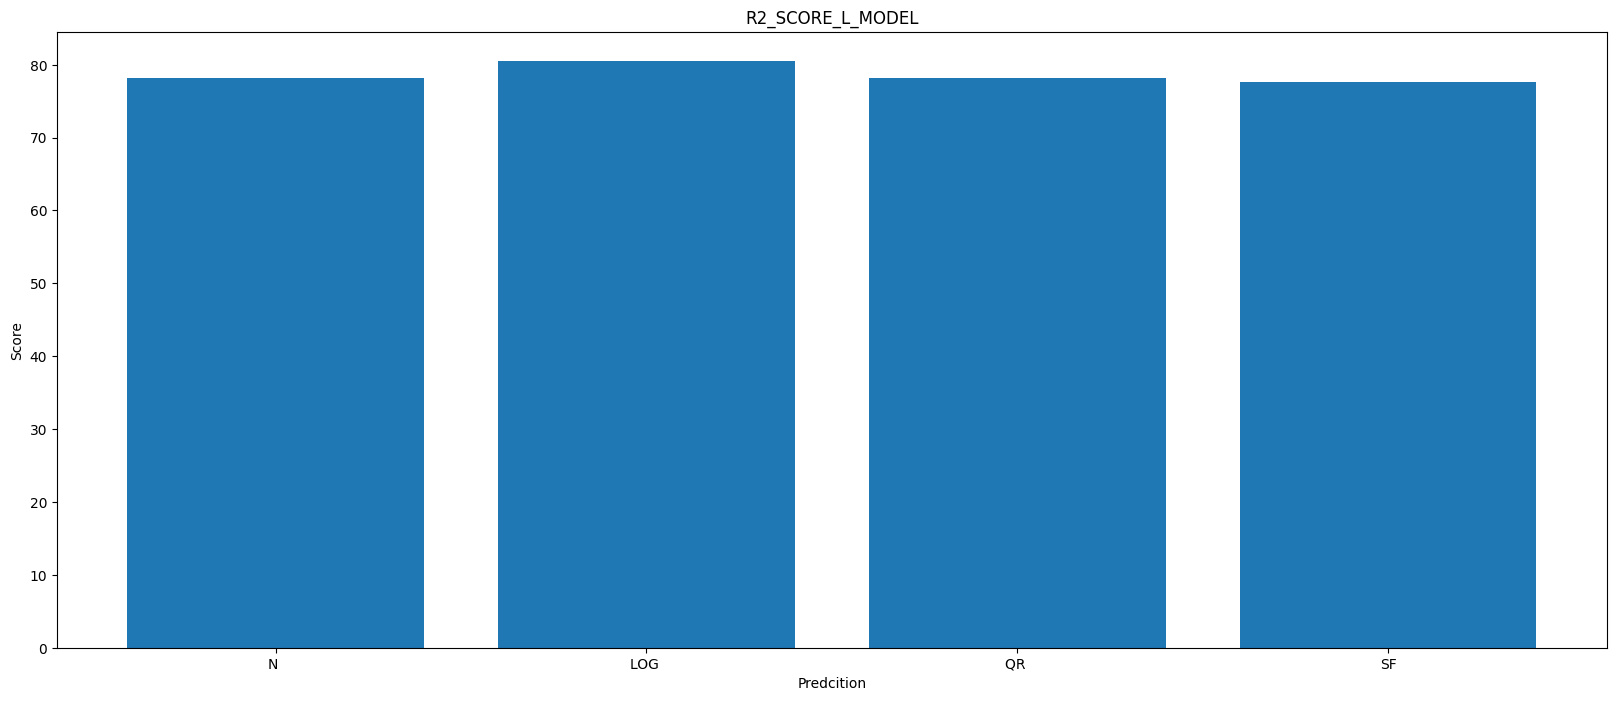

In [299]:
        x_L_R= ["N ","LOG ","QR ","SF"]
        y_L_R=[score_test_L_N,score_test_L_LG, score_test_L_QR, score_test_L_SF]
        plt.figure(figsize=(20,8))
        plt.bar(x_L_R , y_L_R)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_L_MODEL")
        plt.show()

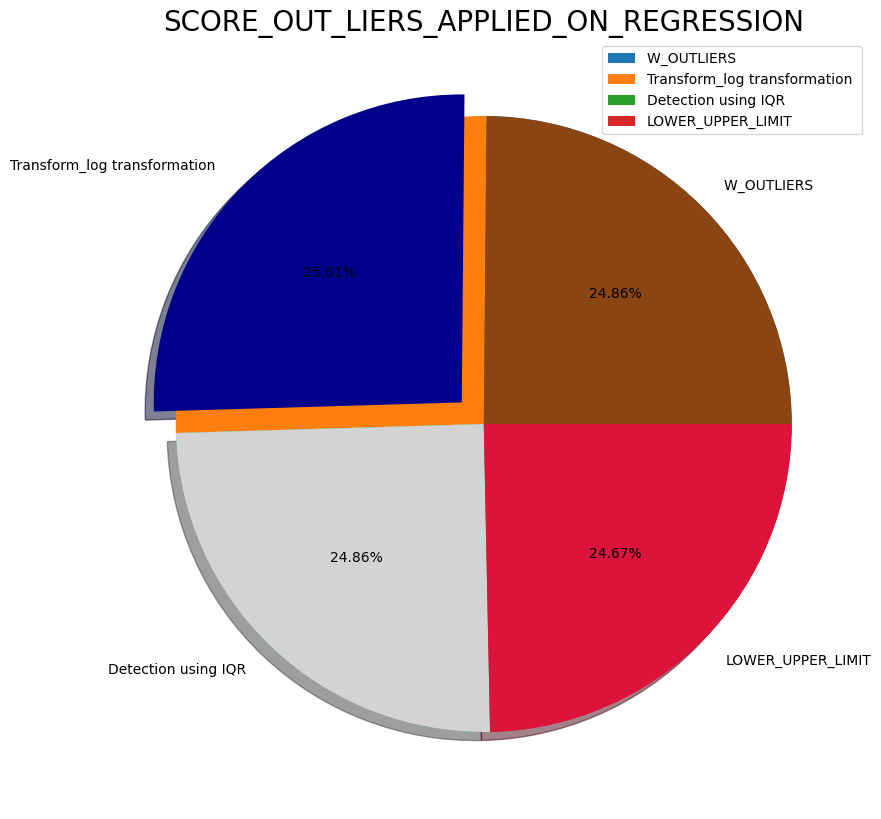

In [301]:
X= ["W_OUTLIERS ","Transform_log transformation ","Detection using IQR ","LOWER_UPPER_LIMIT"]
DATA=[78.14,80.50,78.14,77.56]
colors = ['saddlebrown', 'darkblue', 'lightgrey','crimson']
EXPLOD = [0.0, 0.1, 0.0, 0.0]
plt.figure(figsize=(50, 10))
plt.pie(DATA)
plt.title("SCORE_OUT_LIERS_APPLIED_ON_REGRESSION", fontsize=20)
plt.legend(X)
plt.pie(DATA,
        explode=EXPLOD,
        labels=X,
        colors=colors,
        autopct='%.2f%%',
        shadow=True)
plt.show()